In [63]:
import os.path
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math

from pathlib import Path, PureWindowsPath, PurePosixPath
import tifffile

from binscale.scaler import Scaler
from binscale.converter import Converter

In [65]:
def read_tifffile(file_, lazy=False):
    descriptor = tifffile.TiffFile(file_)
    img = tifffile.memmap(file_) if lazy else tifffile.imread(file_)
    full_len = len(descriptor.pages)
    loaded_len = len(img)

    # for handling multi-page tiffs
    if loaded_len < full_len:
        if not lazy:
            img = np.array([page.asarray() for page in descriptor.pages])

        else:
            final_shape = (full_len, *img.shape[1:])
            with tempfile.NamedTemporaryFile() as f:
                img = np.memmap(f.name, dtype=img.dtype, mode='w+', shape=final_shape)
                for i, page in enumerate(descriptor.pages):
                    img[i] = page.asarray()
                    img = np.memmap(f.name, dtype=img.dtype, mode='r+', shape=final_shape)

    return img

def make_figure(im, file_path):
    fig = plt.figure(figsize= (10,10), layout="tight")

    gs = GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[0, 1])
    ax4 = fig.add_subplot(gs[1, 1])
    
    sz = math.floor(im.shape[0] / 2)
    sy = math.floor(im.shape[1] / 2)
    sx = math.floor(im.shape[2] / 2)

    c = 1008

    ax1.imshow(np.zeros((2*sy,2*sx)), cmap='gray')
    ax1.axis('off')
    #plt.show()

    ax2.imshow(im[sz], cmap='gray')
    ax2.axis('off')
   
    ax3.imshow(im[:,sy,:], cmap='gray')
    ax3.axis('off')
    
    ax4.imshow(im[:,:,sx], cmap='gray')
    ax4.axis('off')
    
    plt.show()

    fig.savefig(file_path)

In [34]:
path_table = Path('c:\\Users\\fe0968\\Documents\\data\\xenopus\\')
path_data = Path('c:\\Users\\fe0968\\Documents\\data\\xenopus\\align\\')

In [35]:
im = read_tifffile(path_data / 'test_32bit.tif')

In [42]:
im.dtype
#plt.imshow(im[100])

dtype('<f4')

In [57]:
%%time
conv = Converter()
im_8 = conv(im)
print(im_8[1])

sc = Scaler(0.5)
im_sc = sc(im_8[0])

(94.0, 182.0)
Wall time: 2.37 s


In [58]:
%%time

sc = Scaler(0.5)
im_sc = sc(im)

conv = Converter()
im_8 = conv(im_sc[0])
print(im_8[1])




(93.84601593017578, 179.83016967773438)
Wall time: 1.8 s


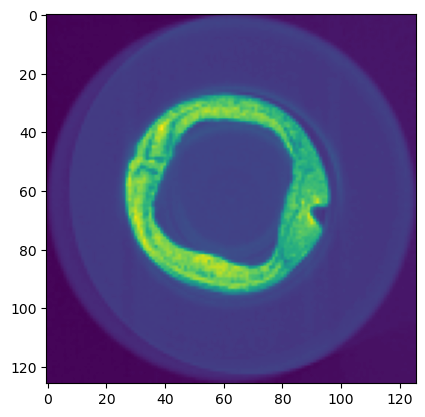

In [52]:
plt.imshow(im_sc[0][50])

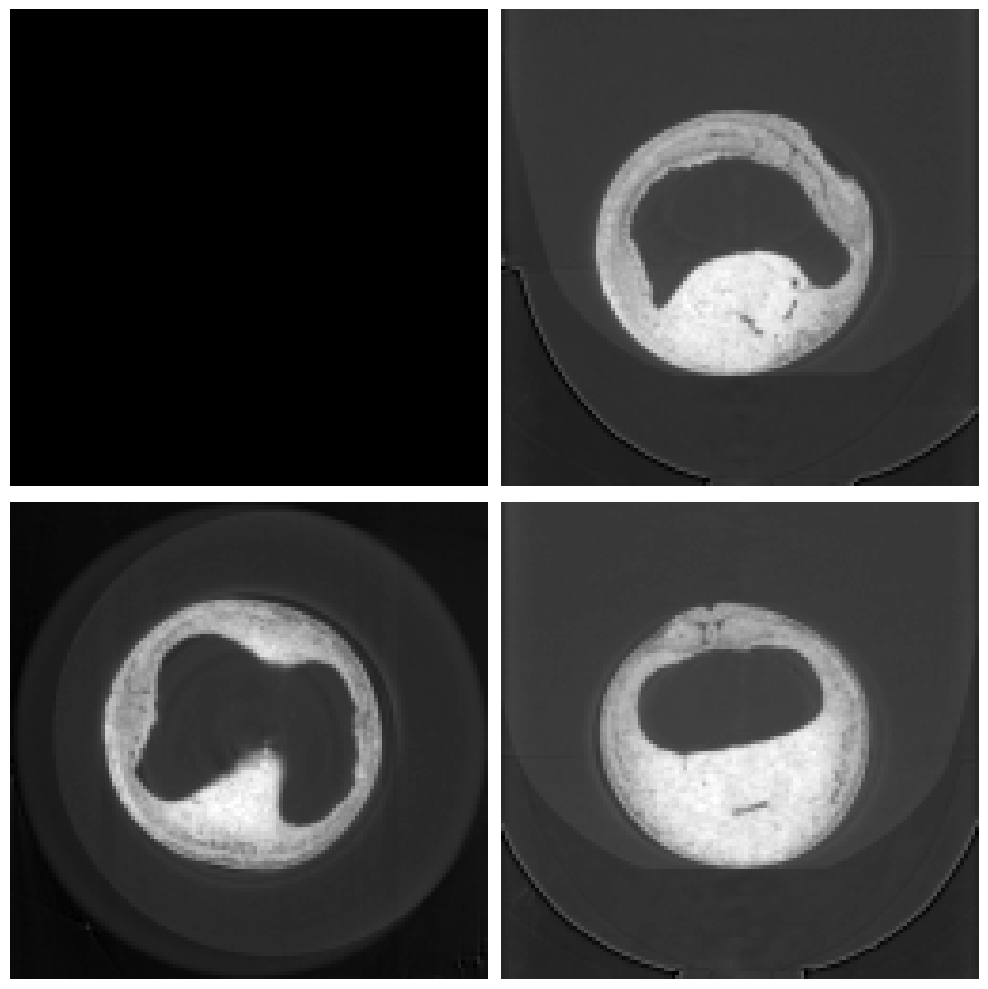

In [66]:
make_figure(im_sc[0])

In [46]:
im_8[0].dtype

dtype('uint8')

In [54]:
tifffile.imsave(path_data / 'res_conv.tif', im_8[0])
tifffile.imsave(path_data / 'res_conv_scaled.tif', im_sc[0])

In [4]:
dt = pd.read_excel('Liste Alexey erste Runde Rotation.xlsx', index_col=0)  

In [5]:
dt

,stage,Naming,path,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,comments,Unnamed: 15,Daten durch 26.679486 teilen
Anzahl,,,,,,,,,,,,,,,,
1,1,A2p0_01_01,Z:\2021_02_xeno1\xeno2_2021-03-02\Xeno_Atlas2_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,A2p0_01_02,Z:\2021_02_xeno1\xeno2_2021-03-02\Xeno_Atlas2_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,A2p0_01_03,Z:\2021_02_xeno1\xeno2_2021-03-02\Xeno_Atlas2_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,A2p2_02_15,Z:\2021_08\A2p2_Proben\A2p2_Al_1p5_100_fps_st_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,A2p2_02_13,Z:\2021_08\A2p2_Proben\A2p2_Al_1p5_100_fps_st_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,22,A2p2_22_01,Z:\2021_08\A2p2_Proben\A2p2_Al_1p5_100_fps_st_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,22,A2p2_22_05,Z:\2021_08\A2p2_Proben\A2p2_Al_1p5_100_fps_st_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,22,A2p2_22_07,Z:\2021_08\A2p2_Proben\A2p2_Al_1p5_100_fps_st_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
prefix = '/mnt/HD-LSDF/Xenopus/'

for i in range(len(dt)):
    
    path = dt.iloc[i]['path']
    
    pw = PureWindowsPath(path)
    #print(pw)
    pl = PurePosixPath(prefix, *pw.parts[1:])
    print(pl)
    
    if os.path.isfile(pl):
        print('OK')
    
    #print(dt.iloc[i]['Naming'])

/mnt/HD-LSDF/Xenopus/2021_02_xeno1/xeno2_2021-03-02/Xeno_Atlas2_20_EtOH_IOD_0p2_0p7Al_st_1_1_z_00/slices-pr/slice.tif
/mnt/HD-LSDF/Xenopus/2021_02_xeno1/xeno2_2021-03-02/Xeno_Atlas2_20_EtOH_IOD_0p2_0p7Al_st_1_2_z_00/slices-pr-reg/slice.tif
/mnt/HD-LSDF/Xenopus/2021_02_xeno1/xeno2_2021-03-02/Xeno_Atlas2_20_EtOH_IOD_0p2_0p7Al_st_1_3_z_00/slices-pr/slice.tif
/mnt/HD-LSDF/Xenopus/2021_08/A2p2_Proben/A2p2_Al_1p5_100_fps_st_2_20EtOH_0p2_IOD_015_z_00/slices-pr/slice.tif
/mnt/HD-LSDF/Xenopus/2021_08/A2p2_Proben/A2p2_Al_1p5_100_fps_st_2_20EtOH_0p2_IOD_013_z_00/slices-pr/slice.tif
/mnt/HD-LSDF/Xenopus/2021_08/A2p2_Proben/A2p2_Al_1p5_100_fps_st_2_20EtOH_0p2_IOD_002_z_00/slices-pr/slice.tif
/mnt/HD-LSDF/Xenopus/2021_08/A2p2_Proben/A2p2_Al_1p5_100_fps_st_3_20EtOH_0p2_IOD_007_z_00/slices-pr/slice.tif
/mnt/HD-LSDF/Xenopus/2021_08/A2p2_Proben/A2p2_Al_1p5_100_fps_st_3_20EtOH_0p2_IOD_006_z_00/slices-pr/slice.tif
/mnt/HD-LSDF/Xenopus/2021_08/A2p2_Proben/A2p2_Al_1p5_100_fps_st_3_20EtOH_0p2_IOD_004_z_00/sl

In [68]:
from os import listdir
from os.path import isfile, join

p = Path('z:\\projects\\code-vita\\Xenopus\\atlas_reduced\\')

onlyfiles = [f for f in listdir(p) if isfile(join(p, f))]

In [71]:
proc_files = [f.split('.')[0] for f in onlyfiles]

In [72]:
proc_files

['A2p0_01_01',
 'A2p0_01_02',
 'A2p0_01_03',
 'A2p0_04_01',
 'A2p0_04_03',
 'A2p0_05_01',
 'A2p0_05_02',
 'A2p0_05_03',
 'A2p0_05_04',
 'A2p0_07_10',
 'A2p0_07_12',
 'A2p0_07_7',
 'A2p0_08_02',
 'A2p0_08_03',
 'A2p0_09_02',
 'A2p0_10p5_2',
 'A2p0_10_3',
 'A2p0_10_4',
 'A2p0_10_5',
 'A2p0_11p5_2',
 'A2p0_11p5_3',
 'A2p0_11p5_5',
 'A2p0_11p5_6',
 'A2p0_11_1',
 'A2p0_11_4',
 'A2p0_12p5_1',
 'A2p0_12p5_2',
 'A2p0_12p5_4',
 'A2p0_12_1',
 'A2p0_12_2',
 'A2p0_12_3',
 'A2p0_12_4',
 'A2p0_12_5',
 'A2p0_13_1',
 'A2p0_13_2',
 'A2p0_13_3',
 'A2p0_13_4',
 'A2p0_14_2',
 'A2p0_14_4',
 'A2p0_15_3',
 'A2p0_17_2',
 'A2p0_20_01',
 'A2p0_20_02',
 'A2p0_21_3',
 'A2p0_21_4',
 'A2p1_09_01',
 'A2p1_09_02',
 'A2p1_09_03',
 'A2p1_10p5_3',
 'A2p1_11_5',
 'A2p1_11_7',
 'A2p1_13_3',
 'A2p1_15_2',
 'A2p1_15_4',
 'A2p1_16_4',
 'A2p1_16_5',
 'A2p1_18_02',
 'A2p1_18_05',
 'A2p1_18_07',
 'A2p1_18_09',
 'A2p1_18_6',
 'A2p1_18_8',
 'A2p1_23_07',
 'A2p2_02_02',
 'A2p2_02_13',
 'A2p2_02_15',
 'A2p2_03_04',
 'A2p2_03_06',
 

In [75]:
all_data = dt["Naming"].tolist()

In [79]:
set(all_data) & set(proc_files)

SyntaxError: invalid syntax (2442734773.py, line 1)

In [78]:
[i for i, j in zip(all_data, proc_files) if i != j]

['A2p2_02_15',
 'A2p2_02_13',
 'A2p2_02_02',
 'A2p2_03_07',
 'A2p2_03_06',
 'A2p2_03_04',
 'A2p0_04_01',
 'A2p0_04_03',
 'A2p0_05_02',
 'A2p0_05_01',
 'A2p0_05_03',
 'A2p0_05_04',
 'A2p2_06_03',
 'A2p2_06_08',
 'A2p2_06_09',
 'A2p2_06_04',
 'A2p0_07_7',
 'A2p0_07_12',
 'A2p0_07_10',
 'A2p2_08_09',
 'A2p2_08_02',
 'A2p0_08_02',
 'A2p0_08_03',
 'A2p2_08_10',
 'A2p0_09_02',
 'A2p1_09_01',
 'A2p1_09_02',
 'A2p1_09_03',
 'A2p1_09_05',
 'A2p0_10_1',
 'A2p0_10_4',
 'A2p0_10_5',
 'A2p1_10p5_3',
 'A2p0_10_3',
 'A2p0_10p5_2',
 'A2p1_11_5',
 'A2p0_11_1',
 'A2p0_11_4',
 'A2p1_11_7',
 'A2p0_11p5_6',
 'A2p0_11p5_2',
 'A2p0_11p5_3',
 'A2p0_11p5_5',
 'A2p0_12_1',
 'A2p0_12_2',
 'A2p0_12_3',
 'A2p0_12_4',
 'A2p0_12_5',
 'A2p0_12p5_1',
 'A2p0_12p5_2',
 'A2p0_12p5_4',
 'A2p1_13_3',
 'A2p0_13_1',
 'A2p0_13_2',
 'A2p0_13_3',
 'A2p0_13_4',
 'A2p2_14_02',
 'A2p0_14_2',
 'A2p0_14_4',
 'A2p1_15_4',
 'A2p1_15_2',
 'A2p0_15_3',
 'A2p0_17_2',
 'A2p1_16_4',
 'A2p1_16_5',
 'A2p1_18_8',
 'A2p1_18_6',
 'A2p2_17_01',


In [80]:
set(all_data).difference(set(proc_files))

{'A2p0_10_1', 'A2p1_09_05'}

In [81]:
set(proc_files).difference(set(all_data))

set()

In [82]:
dt.iloc[0]['Naming']

'A2p0_01_01'